In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:

# --- Step 1: Load Dataset ---
try:
    df = pd.read_csv(r"C:\Users\USER\python\heart_data_clean.csv")
    print("Dataset loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print(" 'heart_data_clean.csv' not found")
    raise

df.head()


Dataset loaded successfully. Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:

# --- Step 2: Separate Features (X) and Target (y) ---
X = df.drop("target", axis=1)   
y = df["target"]               

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:

# --- Step 3: Apply PCA without specifying components ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(" Explained Variance Ratio per Component:")
print(explained_variance)


 Explained Variance Ratio per Component:
[0.23687279 0.12307138 0.09531354 0.08434038 0.07583033 0.06793044
 0.06651688 0.059837   0.0528847  0.04334829 0.03526033 0.03157598
 0.02721797]


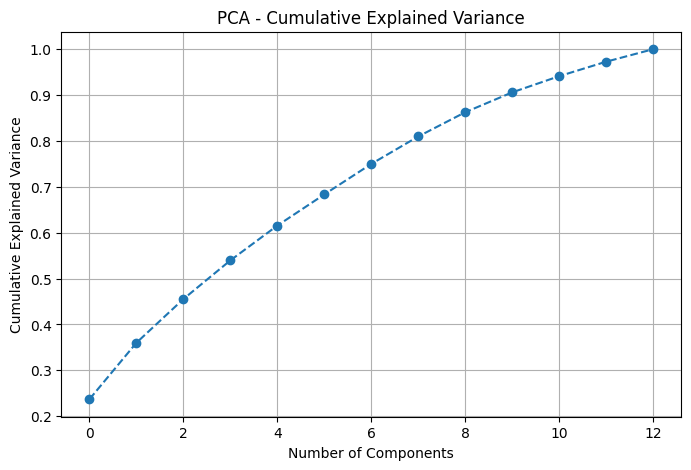

 Optimal number of components to retain 95% variance: 12


In [5]:

# --- Step 4: Determine optimal number of components ---
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f" Optimal number of components to retain 95% variance: {optimal_components}")


In [6]:

# --- Step 5: Apply PCA with optimal k ---
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X_scaled)

pca_columns = [f"PC{i+1}" for i in range(optimal_components)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_columns)
df_pca["target"] = y
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,target
0,1.162722,-0.929622,3.212341,2.248647,0.117105,0.164221,0.966571,-0.596128,-1.484567,-0.453161,0.222642,0.497023,0
1,3.217830,-1.451021,-0.481532,-0.849814,-0.138780,-0.631340,0.403677,1.058591,0.419353,1.475782,-1.032829,-0.942472,1
2,3.143604,0.636569,-0.364301,-0.607485,0.045832,-1.003931,0.681505,0.185650,0.057853,0.470704,0.340281,0.895176,1
3,-0.464908,1.409706,0.395323,2.797258,0.874659,-0.160742,-0.644582,-2.159004,0.877933,0.243848,-1.545183,0.170085,0
4,-2.268663,-0.388683,-0.068956,1.170135,0.839176,-0.141872,0.729038,0.033008,1.067675,0.553453,0.912098,-0.281023,0


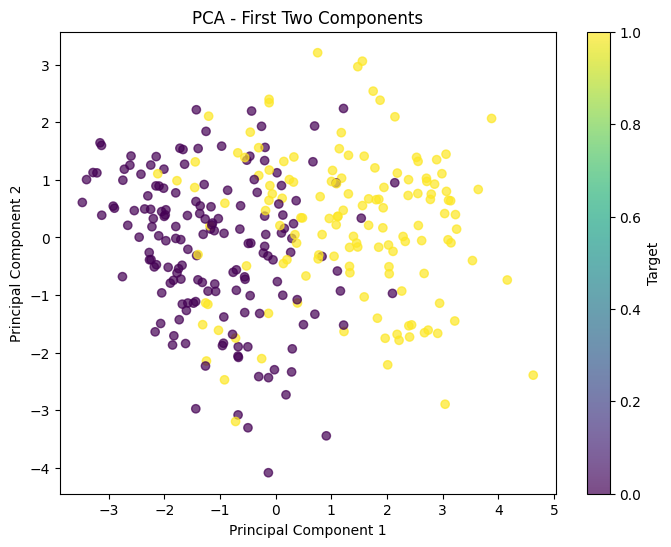

In [7]:

# --- Step 6: Visualize First Two Principal Components ---
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["target"], cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components")
plt.colorbar(label="Target")
plt.show()


In [8]:

# --- Step 7: Save PCA-transformed dataset ---
output_file = r"C:\Users\USER\python\heart_pca.csv"
df_pca.to_csv(output_file, index=False)

